# Introdução

**Antes de partirmos estritamente para o código, gostaria de esclarecer os motivos deste ter sido criado, e sua importância para o projeto.**

**A função transforms.Compose permite compor uma sequência de transformações de imagem em uma única transformação. Essas transformações podem incluir redimensionamento, recorte, normalização e outras operações.
Entretanto, a transformação de troca de background não existe nativamente no framework Pytorch, assim, é preciso criar a função do zero, lembrando que precisamos manter o fluxo de transformações dentro da composição. Em outras palavras, caso nossa função de troca de background esteja sendo usada com outras funções, precisamos manipular a imagem de maneira que ela continue sofrendo transformações pelas funções nativas do PyTorch.**

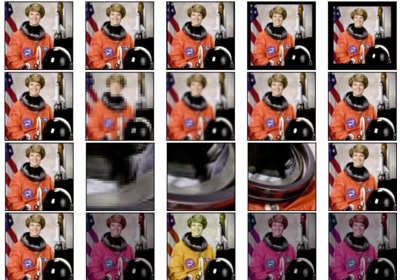

# Código

Neste trecho de código, estamos importando as bibliotecas e módulos necessários para o nosso projeto. Essas bibliotecas são essenciais para realizar tarefas relacionadas ao processamento de imagens e manipulação de tensores. São elas:

*   **torchvision.transforms as transforms**: Utilizamos o módulo transforms da biblioteca torchvision. Ele é amplamente empregado para realizar transformações em imagens, como redimensionamento, rotação, entre outras.

*   **import numpy as np**: Numpy é uma ferramenta para trabalhar com arrays multidimensionais e realizar operações matemáticas.

*   **import random**: O módulo random é usado para gerar números aleatórios.

*   **import os**: O módulo os é útil para interagir com o sistema operacional.

*   **from PIL import Image**: Essa classe permite carregar, manipular e salvar imagens.

*   **import cv2**: O OpenCV é uma biblioteca popular para processamento de imagens e visão computacional, e o módulo cv2 é usado para realizar operações avançadas em imagens, como detecção de objetos, rastreamento, etc.

*   **from google.colab.patches import cv2_imshow**: Esta importação traz a função cv2_imshow do módulo google.colab.patches. Ela é especialmente útil no ambiente do Google Colab para exibir imagens diretamente no notebook.


In [ ]:
import torchvision.transforms as transforms
import numpy as np
import random
import os
import torch
from PIL import Image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


    Descrição da ChangeBackground()

    Essa classe é responsável por criar uma transformação custom em nossa imagem durante o pré-processamento de dados.
    Ela realiza a troca de background de uma foto, por outras fotos em uma determinada pasta.
    A probabilidade da troca é calculada em função da quantidade de imagens disponíveis na pasta de backgrounds.
    Lembrando que a própria imagem com background já conta como um sample, então ela entra no cálculo de probabilidade.

    INIT:
        path_background (str): Path da pasta que contém uma quantidade M de imagens que serão usadas como background.
    
    __CALL__:
        img (Image PIL): Imagem que sofrerá a transformação custom.

  


In [ ]:
class ChangeBackground():
    def __init__(self, path_background):
         background_names = os.listdir(path_background)
         self.background_list = []

         for background in background_names:
           background_path = os.path.join(path_background, background)
           self.background_list.append(background_path)


         self.num_imgs = len(self.background_list)

         self.lower_green = (30, 70, 70)
         self.upper_green = (90, 255, 255)



    def __call__(self, img):

        number = random.randint(0, self.num_imgs)

        img = np.array(img)
        img = cv2.resize(img, (350,300))

        if number != self.num_imgs:
          hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

          green_background = cv2.inRange(hsv, self.lower_green, self.upper_green)
          not_green = cv2.bitwise_not(green_background)

          bg = cv2.imread(self.background_list[number])
          bg = cv2.resize(bg, (img.shape[1], img.shape[0]))

          result = cv2.bitwise_and(img, img, mask = not_green)
          result2 = cv2.bitwise_or(result, bg, mask = green_background)
          changed_image = cv2.add(result, result2)


          changed_image = Image.fromarray(changed_image)
          return changed_image
        else:
          img = Image.fromarray(img)
          return img

Nesse trecho de código nós criamos nosso objeto transform, que é derivado da classe transforms.Compose.
Por ser apenas uma demonstração, apenas utilizei nossa função custom, mas poderíamos inserir outra transformação também (ex: Gaussian Noise)

Lembrando que é preciso criar uma pasta nesse notebook collab com imagens de background.

In [ ]:
transform = transforms.Compose([
    ChangeBackground(('/content/backgrounds')),
])

['/content/backgrounds/background1.jpg', '/content/backgrounds/background2.jpeg']


Utilizando a biblioteca PIL, carregamos a imagem que iremos trocar o background.

In [ ]:
imagem = Image.open('/content/drive/MyDrive/Water Level Identification/River/NoBackground Images River/Arquivo_007.jpg')

NameError: ignored

Neste trecho de código, uma imagem é submetida a uma transformação definida na variável transform, resultando em img. A imagem transformada é convertida em um array numpy, armazenado em img_final. Por fim, a função cv2_imshow é usada para exibir a imagem.

In [ ]:
img = transform(imagem)
img_final = np.array(img)
cv2_imshow(img_final)